In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [28]:
diabetes = pd.read_csv('diabetes.csv')

In [29]:
parameters = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Diabetes_012']
key_diabetes = diabetes[parameters]

In [30]:
X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
y = key_diabetes['Diabetes_012']
X.describe()

,HighBP,HighChol,BMI,GenHlth,DiffWalk
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,28.382364,2.511392,0.168224
std,0.494934,0.494210,6.608694,1.068477,0.374066
min,0.000000,0.000000,12.000000,1.000000,0.000000
25%,0.000000,0.000000,24.000000,2.000000,0.000000
50%,0.000000,0.000000,27.000000,2.000000,0.000000
75%,1.000000,1.000000,31.000000,3.000000,0.000000
max,1.000000,1.000000,98.000000,5.000000,1.000000


Standardization of features to not skew the simulated test data generated by SMOTE

Standardized features will be used by both SMOTE model and non-SMOTE model to maintain consistency

In [31]:
X_minmax = X - X.min() # this turns minimum value of each column to 0
ranges = X.max() - X.min() # calculate the range per column
X_minmax = X_minmax/ranges # this turns maximum value to 1

X_minmax.describe()

,HighBP,HighChol,BMI,GenHlth,DiffWalk
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.190493,0.377848,0.168224
std,0.494934,0.494210,0.076845,0.267119,0.374066
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.139535,0.250000,0.000000
50%,0.000000,0.000000,0.174419,0.250000,0.000000
75%,1.000000,1.000000,0.220930,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X,y)
print(y_res.value_counts())

Diabetes_012
0.0    213703
2.0    213703
1.0    213703
Name: count, dtype: int64


In [33]:
#X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
#y = key_diabetes['Diabetes_012']
#smote = SMOTE()
#X_res, y_res = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 1)

print(y_train.value_counts())
X_train.shape

Diabetes_012
2.0    171082
0.0    171009
1.0    170796
Name: count, dtype: int64


(512887, 5)

Text(0, 0.5, 'Accuracy')

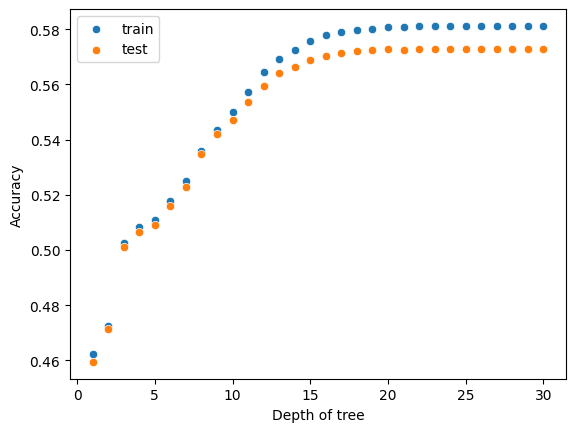

In [34]:
depths = range(1, 31)
train_scores = []
test_scores = []

for depth in depths:
    T = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=depths, y=train_scores, label='train')
sns.scatterplot(x=depths, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')

In [35]:
from sklearn.metrics import confusion_matrix

y_test_pred = T.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred, labels=[2, 0])

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
FNR = FN / (FN + TP)
precision = TP / (TP + FP)

print("Confusion Matrix:")
print(cm)
print("True Positive Rate (TPR): " + str(TPR))
print("False Positive Rate (FPR): " + str(FPR))
print("False Negative Rate (FNR): " + str(FNR))
print("Precision: " + str(precision))

Confusion Matrix:
[[26826  7495]
 [ 8929 27649]]
True Positive Rate (TPR): 0.7816205821508697
False Positive Rate (FPR): 0.24410848050740883
False Negative Rate (FNR): 0.21837941784913026
Precision: 0.7502726891343868


Text(50.7222222222222, 0.5, 'True Label')

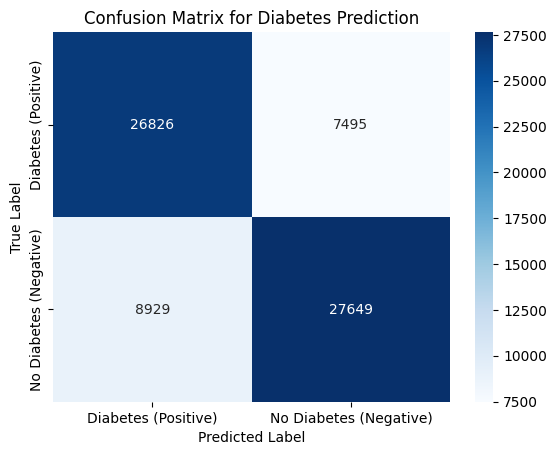

In [36]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

How does model perform without SMOTE balancing?

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
y_train.value_counts()

Diabetes_012
0.0    170905
2.0     28281
1.0      3758
Name: count, dtype: int64

Text(0, 0.5, 'Accuracy')

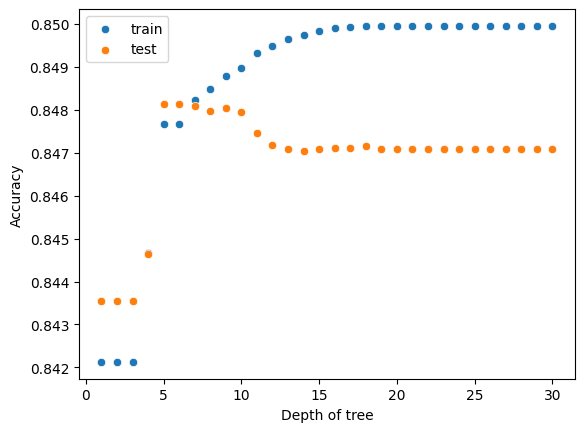

In [38]:
depths = range(1, 31)
train_scores = []
test_scores = []

for depth in depths:
    T = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=depths, y=train_scores, label='train')
sns.scatterplot(x=depths, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')

In [39]:
from sklearn.metrics import confusion_matrix

y_test_pred = T.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred, labels=[2, 0])

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
FNR = FN / (FN + TP)
precision = TP / (TP + FP)

print("Confusion Matrix:")
print(cm)
print("True Positive Rate (TPR): " + str(TPR))
print("False Positive Rate (FPR): " + str(FPR))
print("False Negative Rate (FNR): " + str(FNR))
print("Precision: " + str(precision))

Confusion Matrix:
[[  935  6130]
 [  752 42043]]
True Positive Rate (TPR): 0.13234253361641896
False Positive Rate (FPR): 0.017572146278770885
False Negative Rate (FNR): 0.867657466383581
Precision: 0.5542382928275045


Text(50.7222222222222, 0.5, 'True Label')

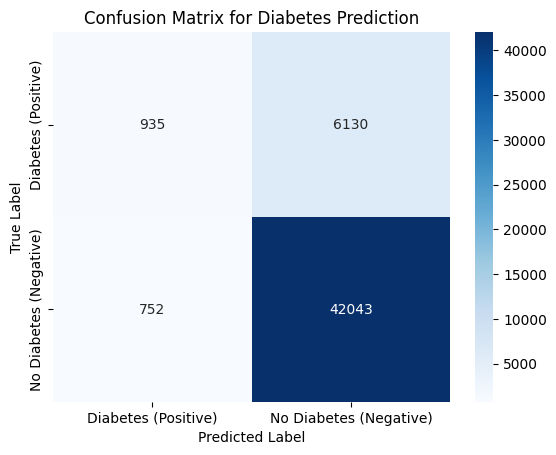

In [40]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

High rate of false negative shows that the model without accounting for the abnormally high percentage of non-diabetic patients using SMOTE has a baseline of defaulting to predict to the majority in the target variable which in this case is that a patient doesn't have diabetes. Since the model that doesn't use SMOTE defaults to this "thinking" pattern we see a high rate of false negatives which isn't good for our test case since predicting that a person doesn't have diabetes when they do can be detrimental to their health. 